# OCR : Image Recognition Project for Beginners

> Divyanshu Vyas | Oil and Gas Data Science/Machine Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [9]:
# import matplotlib.pyplot as plt
# fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
#     ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

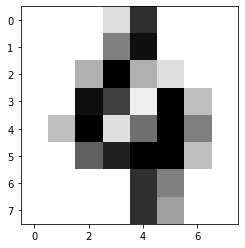

In [14]:
plt.imshow(digits.images[100],cmap='binary')

## Plotting Numbers with correct Labels

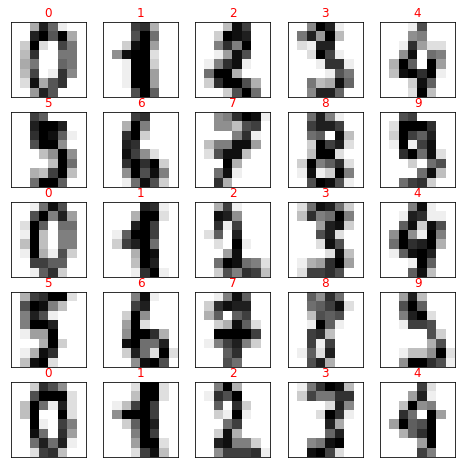

In [34]:
fig, ax = plt.subplots(nrows=5,ncols=5,figsize=(8,8),subplot_kw={'xticks':[], 'yticks':[]})

#ax.flat returns each axis and its index number of a 2D axes canvas in a 1D axes series. 
#In our case, it will return index no. from 1-25 and each axes sheet.

for imno, ax in enumerate(ax.flat):
    ax.imshow(digits.images[imno],cmap='binary')
    ax.set_title(digits.target[imno],color='red')
    

        

## Each Pixel is treated as a feature. Hence, 8x8 = 64 features for each image example. 

In [36]:
digits.data.shape

(1797, 64)

In [45]:
X = digits.data
Xdf = pd.DataFrame(data=X,columns=range(64))

In [46]:
y = digits.target
y = y.reshape(1797,1)

Xdf['y'] = y

In [47]:
df = Xdf

In [51]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
1787,0.0,0.0,10.0,16.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,4.0,0.0,0.0,5
1788,0.0,0.0,0.0,1.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,9.0,0.0,0.0,4
1789,0.0,0.0,8.0,16.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,16.0,10.0,1.0,0.0,0.0,8
1790,0.0,0.0,5.0,12.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,12.0,12.0,3.0,0.0,0.0,8
1791,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0,4
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


In [57]:
# plt.imshow(digits.images[1795])
from sklearn.model_selection import train_test_split

In [58]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

# Algorithm 1 : Gaussian Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
yp_gnb = model.predict(Xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [64]:
accuracy_score(ytest,yp_gnb)

0.8333333333333334

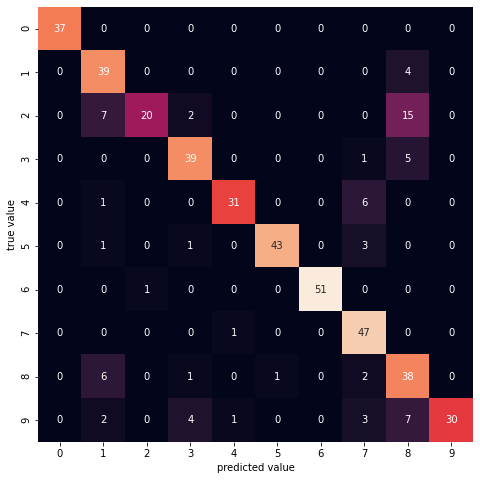

In [70]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(ytest,yp_gnb),square=True, annot=True, cbar=False);
plt.xlabel('predicted value');
plt.ylabel('true value');

## Plotting Numbers with predicted labels

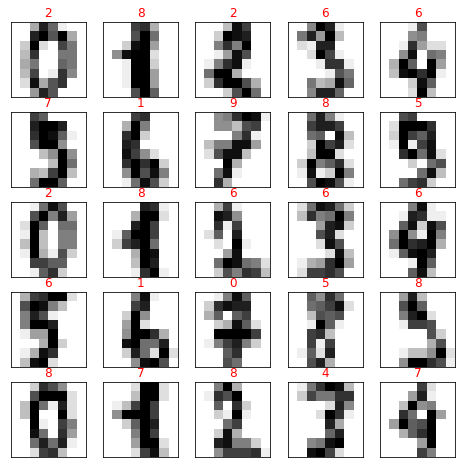

In [71]:
fig, ax = plt.subplots(nrows=5,ncols=5,figsize=(8,8),subplot_kw={'xticks':[], 'yticks':[]})

#ax.flat returns each axis and its index number of a 2D axes canvas in a 1D axes series. 
#In our case, it will return index no. from 1-25 and each axes sheet.

for imno, ax in enumerate(ax.flat):
    ax.imshow(digits.images[imno],cmap='binary')
    ax.set_title(yp_gnb[imno],color='red')

# Dimensionality Reduction

In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components=2)

In [74]:
X_2D = pca.fit_transform(X)

In [84]:
df['PCA1'] = X_2D[:,0]
df['PCA2'] = X_2D[:,1]

In [85]:
#visualize

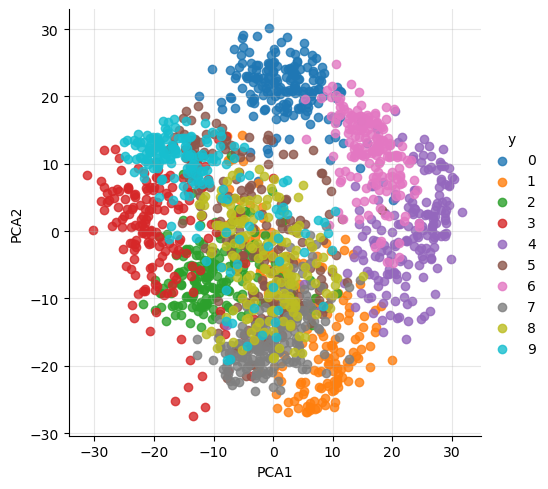

In [95]:
plt.style.use('default')

sns.lmplot('PCA1','PCA2',data=df,hue='y',fit_reg=False);
plt.grid(alpha=0.3)

In [87]:
# df